# interpretability

## abstraction level for model analysis

- Model-level Analysis (influence study): Considering the neural model as a probability distribution and decision function. understanding the input-output behavior of the model.

- Representation-level Analysis (probing study): Viewing the model as a sequence of vector representations of the data at various layers and time steps. understanding how the model transforms input data into output.

- Mechanism-level Analysis (visualization): Focusing on parameter weights and specific mechanisms like attention, dropout, etc. understanding the individual components of the model and how they contribute to the overall behavior.

## out-of-domain evaluation

- Diagnostic Test set: a carefully designed dataset used to test a specific **linguistic knowledge/heuristics** of model. These sets highlight particular linguistic features, such as certain syntactic structures, semantic relationships, or pragmatic elements. 



- heuristics 启发式: surface rules that the model implicitly learns to make predictions more efficiently, but not capture the true underlying linguistic phenomena, so these rules are not accurate for all conditions.

    e.g., in sentiment analysis, model assume all sentences with word "not" have negative sentiment.


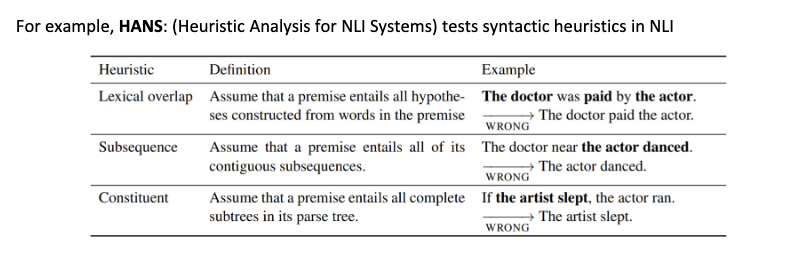

## influence study

influence study: 

- **what factors influence the model's predictions?**

- factors can be individual training examples, features, or parameters

- methods: ablation study, adversarial examples, Contrasting examples, Feature importance analysis, Gradient-based methods


### ablation study

Ablation study: assess importance of individual components of a model by systematically removing or modifying them and observing the impact on performance.

1. Remove or change specific architecture components: a dropout layer, an attention layer, an attention head, connection, layer order

2. Remove specific features

3. Reducd model complexity: decrease depth or width, use simpler activation functions.

4. Modify training data or training process: data size, epochs, optimization algorithm.

e.g., Iteratively remove the most unimportant words and see what is the smallest part of input that model needed to get the same output

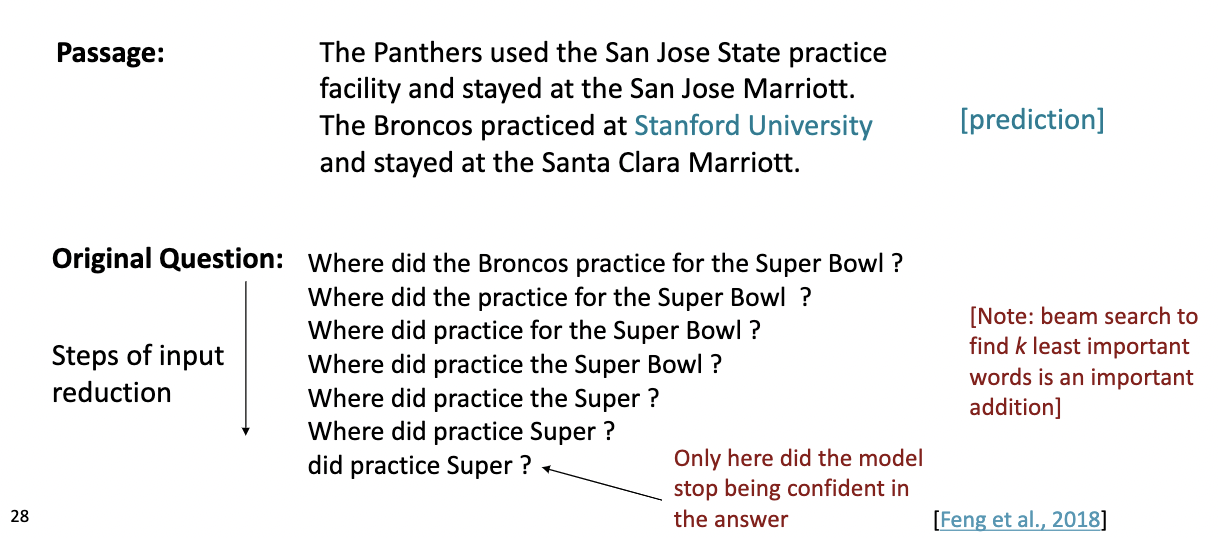

### adversarial example and contrasting example

adversarial examples: Can we break model by making seemingly innocuous changes to the input? 

- goal: reveal vulnerabilities in the model's understanding

- in human perspective, these changes don't change meaning but cause model to make mistake.

- example of reading-comprehension question answering task


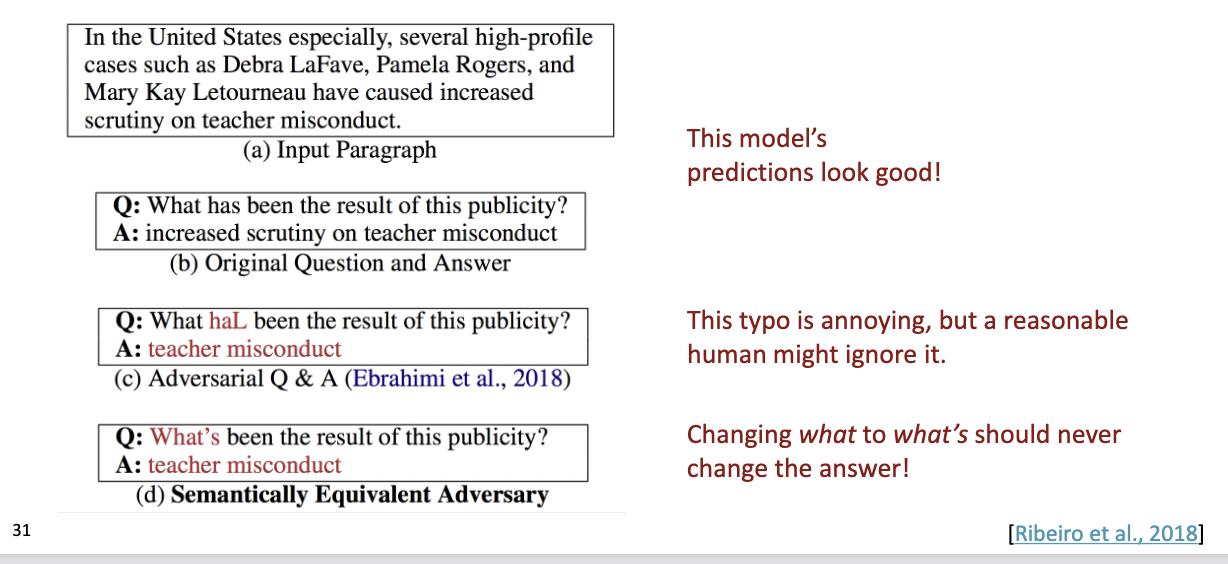

Contrasting examples: pairs of inputs that are similar in many respects but have crucial differences that change the correct output. 

- goal: test the model's understanding of linguistic nuances

- e.g., changing a single word in a sentence can dramatically alter its meaning.

    Sentence A: "The old man the **boats**." ('man' is a verb, means operate boats)

    Sentence B: "The old man the **cars**." ('man' is a noun)

### Feature importance analysis

Feature importance analysis: impact of individual features on the model's predictions. 


methods: permutation importance, SHAP (SHapley Additive exPlanations)



### Gradient-based methods

Gradient-based methods: Compute the gradients of the model's outputs w.r.t its each input token. the token with high gradient norm are "salient" or important for the model's decision. 

saliency map.

## probing study

Probing study:

- **what the model has learned about language?**

- probing means examining, investigating

- learned linguistic knowledge

    - aspect: syntax, semantics, morphology

    - location: internal representation (embeddings or hidden states) from pre-trained language models like BERT or ELMo.

- supervised learning tasks: POS tagging, NER, syntactic dependency relation prediction, semantic role labeling.

- Note: linguistic knowledge are accessible to probing functions (achieve high accuracy on supervised learning tasks), **don't mean they are used by the model**

- example: test if BERT has learned POS property $y$, 
    
    we freeze all the parameters of pretrained BERT, 
    
    train a probe $f$ (simple classifier, linear model or 1-layer FFNN)

    $$\hat y_i = f(h_i)$$

    input: a sequence of hidden states $h_1, ..., h_T$ at a certain layer

    output: a sequence of POS tags $y_1, ..., y_T$

    accuracy: a measure of the accessibility of that feature in the representation

    $T$ is length of input word sequence.

    conclusion: middle layer of BERT has best probing accuracies.

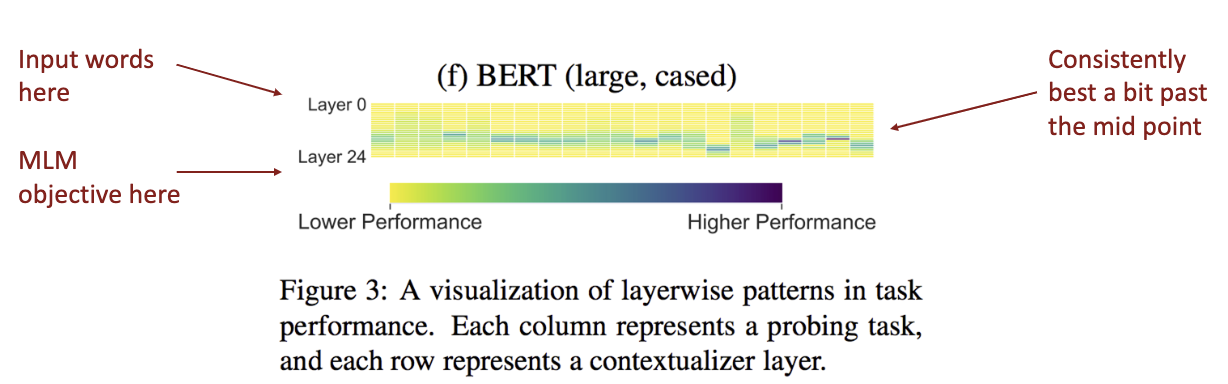

the deeper layer has learned more abstract linguistic properties

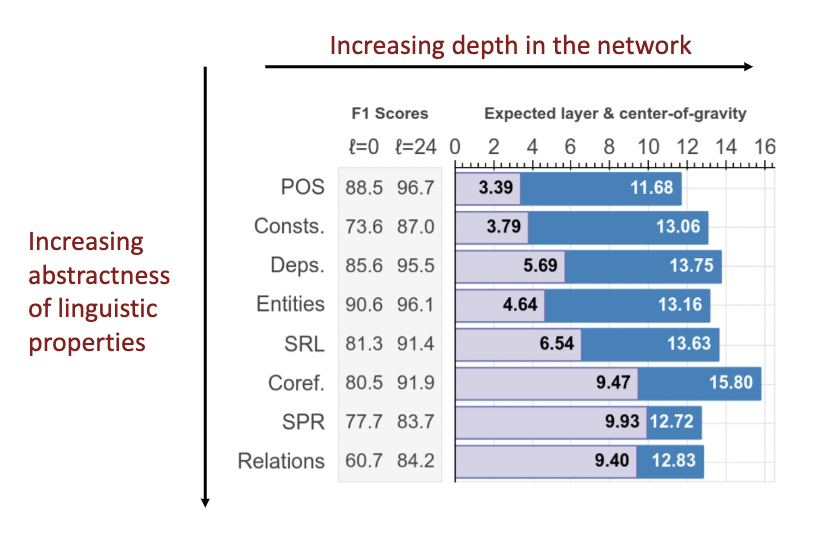

BERT can recover dependency parse tree by probing (transformation)

interpretable concepts approximately map onto simple functions(probing) of the vectors 

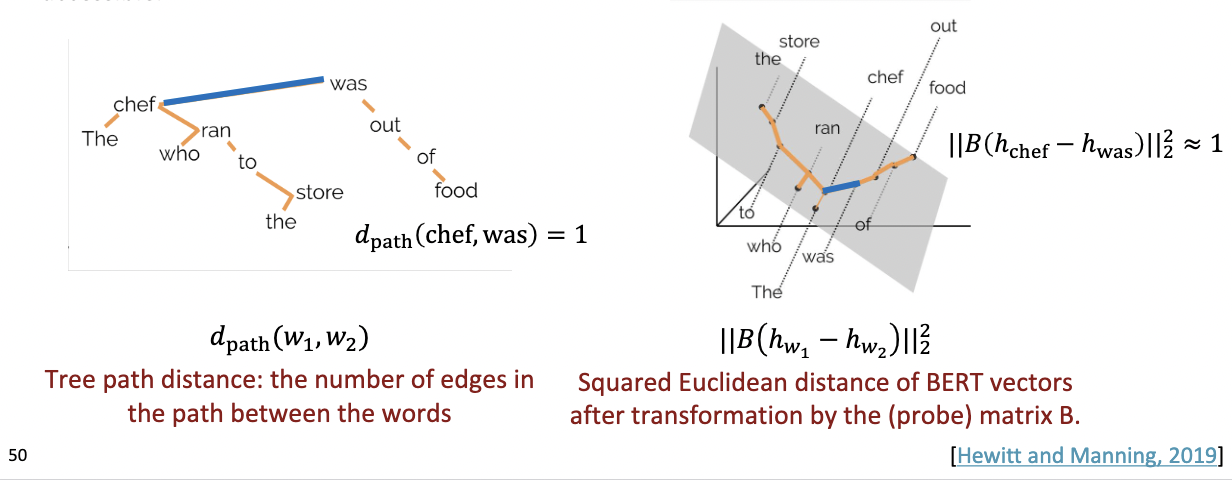

## mechanism-level analysis

Several architecture components lend themseleves to be visualized to provide some interpretability:

However, It’s hard to tell exactly whether/how the model is performing an interpretable function, The decision-making process of these models is often complex and involves interactions between many components, and these visualizations only capture a part of that process.

- Embedding Layers: Word embeddings can be visualized using dimensionality reduction techniques like t-SNE or PCA, show semantic relationships between words.

- Attention Mechanism: attention weights can be visualized as heatmaps, which can help to understand which parts of the input the model is focusing on for each step in the output.

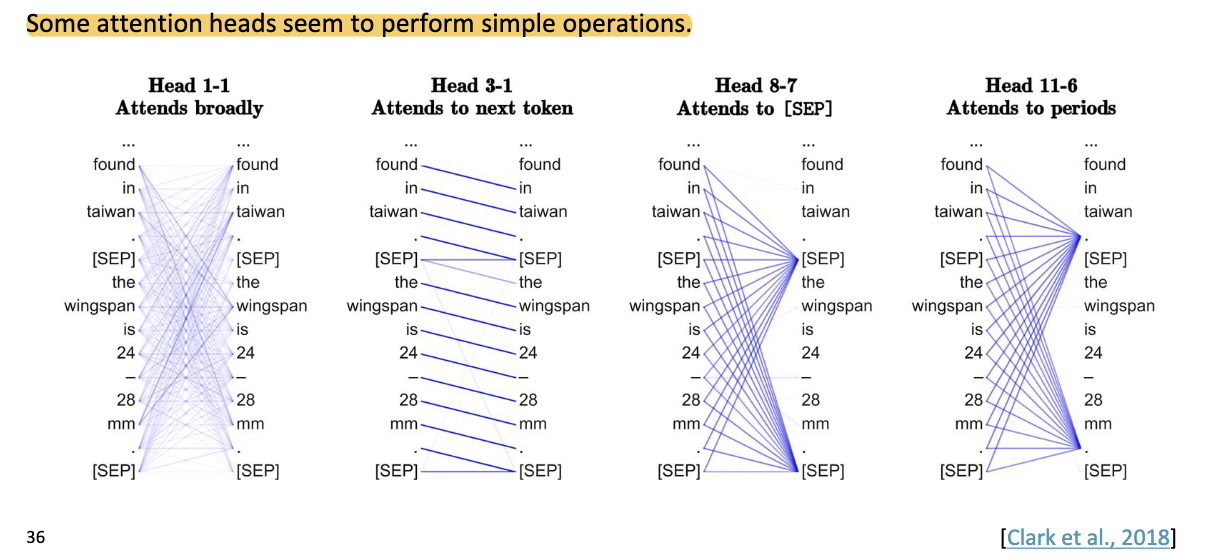

- Convolutional Layers: filters can be visualized to see what kind of local features they capture. For example, a filter in the first layer might learn to recognize common word pairs or phrases.

- RNN hidden layers: Visualizing hidden states can show how gating mechanisms control the flow of information through the model over time.

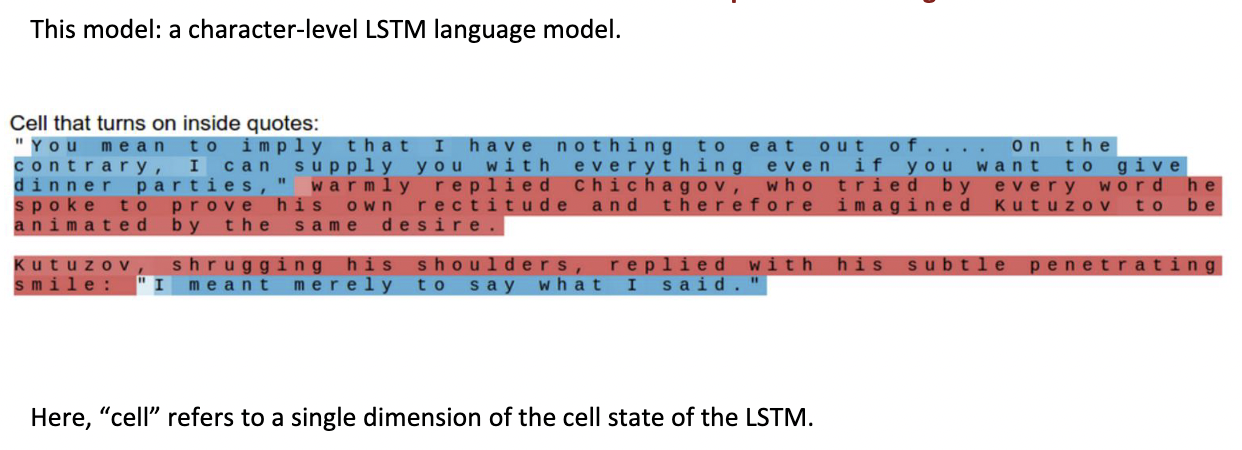

- Decoder Outputs: In seq2seq models, the output probabilities at each step in the decoder can be visualized to show what the model considers as potential next tokens at each step.